In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

from call import Scenarios
from postprocess.analysis import market_value, electricity_balance, hydrogen_balance, pdc_pivot, load_factor, total_investment_costs, full_load_hours, variable_costs 
from postprocess.datahandler import get_table, DataHandler
from postprocess.tools import add_zeros, change_tec_lvl_name_to_alltec
from postprocess.plot import colors_techs, renaming_map_techs, stacked_bar_chart, draw_legend, PlotHandler
from postprocess.renaming import rename_df_index

%load_ext autoreload
%autoreload 2

In [2]:
#code from: http://blog.nextgenetics.net/?e=102
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
focus_region = 'GER'
#focus_scenario = '2016'
scenario_file = 'scenarios_DEMO'    

scenarios = Scenarios(scenario_file + '.yaml')
dh = DataHandler(scenarios)
ph = PlotHandler(dh);

# Electricity

## Capacity

### Capacity in all regions

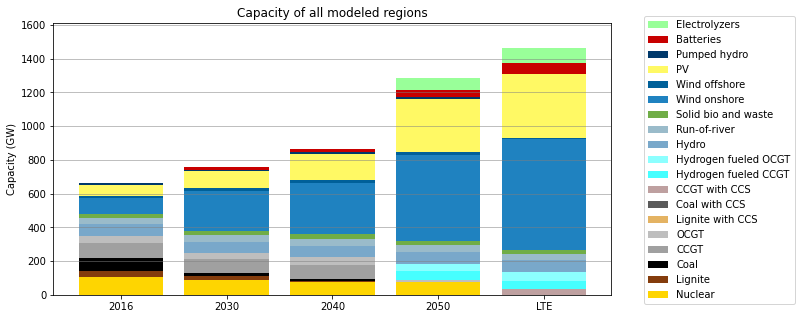

In [3]:
ph.plot_capacity();

### Capacity in focus region

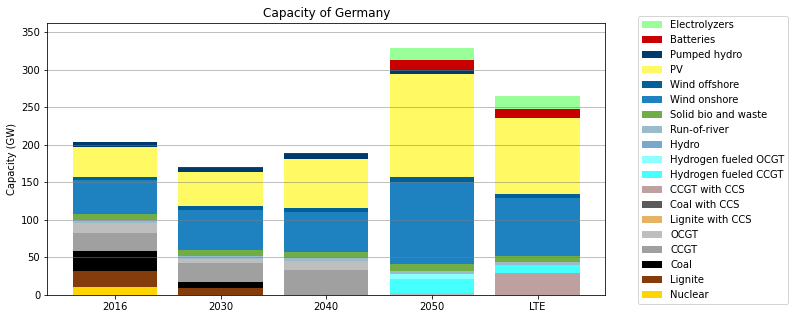

In [4]:
ph.plot_capacity(focus_region=focus_region);

## Balance

### Electricity balance in all regions

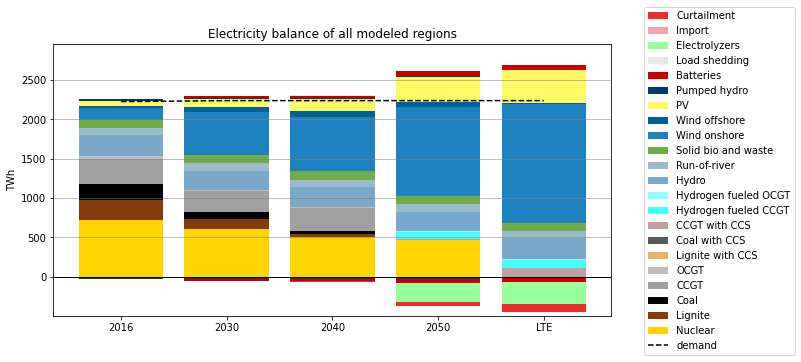

In [5]:
ph.plot_electricity_balance();

### Electricity balance in focus region

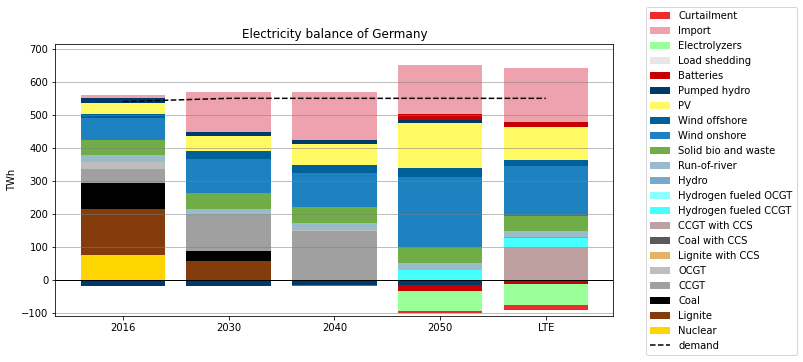

In [6]:
ph.plot_electricity_balance(focus_region=focus_region);

## Electricity Prices

### Baseload Prices of all regions

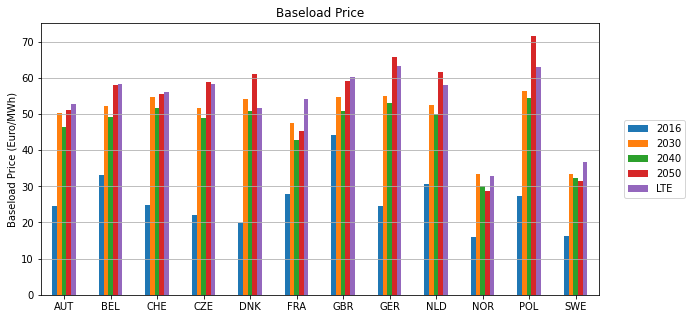

In [7]:
dh.get('o_prices').groupby('r').mean().transpose().T.plot.bar(xlabel = '', ylabel = 'Baseload Price (Euro/MWh)', rot = 0,figsize = (10, 5))
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
plt.grid(axis='y')
plt.title('Baseload Price');

### Price duration curve of focus region

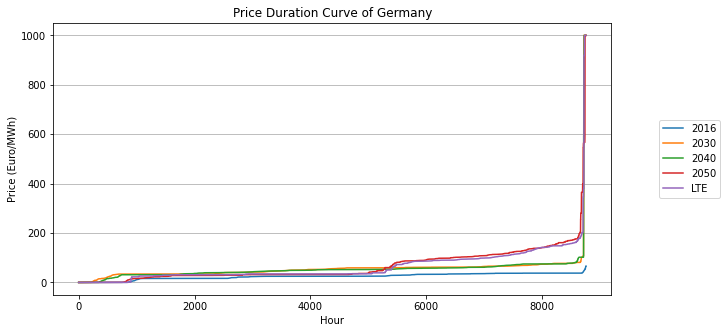

In [8]:
ph.plot_pdc(focus_region=focus_region);

### Market value

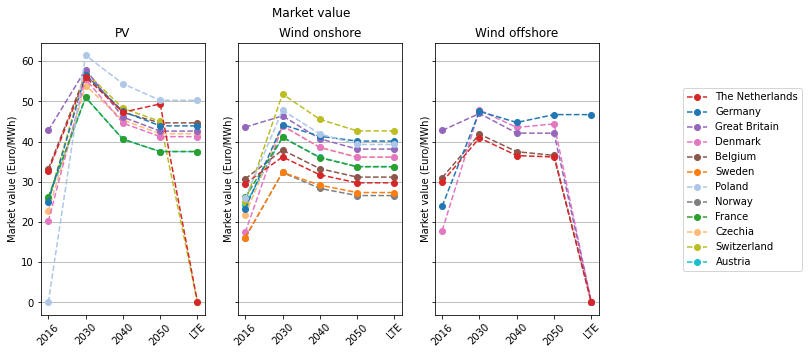

In [9]:
ph.plot_mv(['solar','wion','wiof']);

## Hydrogen

### Hydrogen balance of all regions

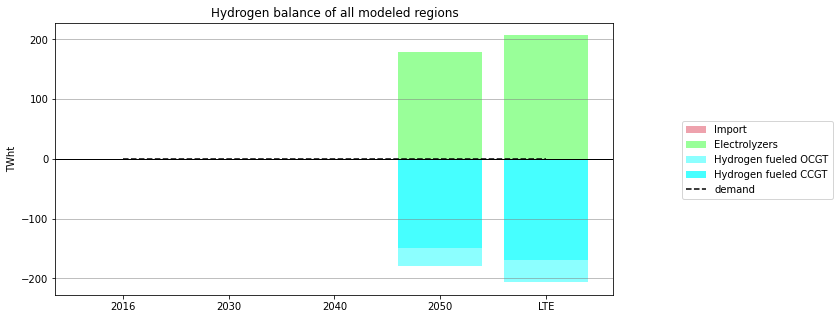

In [10]:
ph.plot_hydrogen_balance();

### Hydrogen Prices

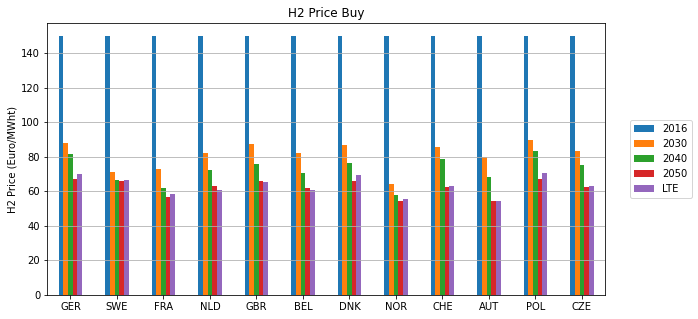

In [12]:
dh.get('o_h2price_buy').transpose().T.plot.bar(xlabel = '', ylabel = 'H2 Price (Euro/MWht)', rot = 0,figsize = (10, 5))
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
plt.grid(axis='y')
plt.title('H2 Price Buy');

# CO2 Emissions

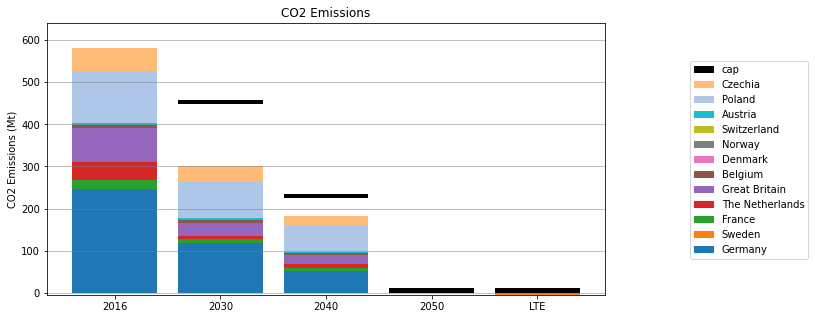

In [13]:
ph.plot_co2_emissions();